In [ ]:
#importing Ecommerce data for home decor from kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("carrie1/ecommerce-data")

print("Path to dataset files:", path)

100%|██████████| 7.20M/7.20M [00:01<00:00, 5.20MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/carrie1/ecommerce-data/versions/1


In [ ]:
import os

# List the files in the dataset directory
dataset_dir = '/root/.cache/kagglehub/datasets/carrie1/ecommerce-data/versions/1'
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        print(file)


data.csv


In [ ]:
import pandas as pd

# Define the path where the dataset is extracted
dataset_path = "/root/.cache/kagglehub/datasets/carrie1/ecommerce-data/versions/1/"

# Load the CSV file (check the exact file name in the extracted folder)
file_name = "data.csv"  # Replace with actual file name if different
df = pd.read_csv(dataset_path + file_name, encoding="ISO-8859-1")

# Display first few rows
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Data Preprocessing

In [ ]:
import pandas as pd

# Sample data
#df = pd.read_csv("ecommerce_data.csv")  # Replace with your actual filename

# Convert InvoiceDate to datetime format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%m/%d/%Y %H:%M")

# Extract useful time-based features
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df["Day"] = df["InvoiceDate"].dt.day
df["Hour"] = df["InvoiceDate"].dt.hour
df["DayOfWeek"] = df["InvoiceDate"].dt.day_name()

# Display the first few rows
print(df[["InvoiceDate", "Year", "Month", "Day", "Hour", "DayOfWeek"]].head())


          InvoiceDate  Year  Month  Day  Hour  DayOfWeek
0 2010-12-01 08:26:00  2010     12    1     8  Wednesday
1 2010-12-01 08:26:00  2010     12    1     8  Wednesday
2 2010-12-01 08:26:00  2010     12    1     8  Wednesday
3 2010-12-01 08:26:00  2010     12    1     8  Wednesday
4 2010-12-01 08:26:00  2010     12    1     8  Wednesday


In [ ]:
import pandas as pd

# Load data
#df = pd.read_csv("ecommerce_data.csv", parse_dates=['InvoiceDate'])

# Basic statistics
print("Total transactions:", df.shape[0])
print("Unique customers:", df['CustomerID'].nunique())
print("Unique products:", df['StockCode'].nunique())
print("Date range:", df['InvoiceDate'].min(), "to", df['InvoiceDate'].max())


Total transactions: 541909
Unique customers: 4372
Unique products: 4070
Date range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Year         541909 non-null  int32         
 9   Month        541909 non-null  int32         
 10  Day          541909 non-null  int32         
 11  Hour         541909 non-null  int32         
 12  DayOfWeek    541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(4), int64(1), object(5)
memory usage: 45.5+ MB


In [ ]:
# Check missing values
missing_values = df.isnull().sum()
print(missing_values)


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Year                0
Month               0
Day                 0
Hour                0
DayOfWeek           0
dtype: int64


In [ ]:
df.shape

(541909, 13)

In [ ]:
135080/541909

0.249266943342886

Since having customer id and product description is esential for our recommendor system we need to remove null values. We removed rows with null Customer ID and Product Description for the following reasons:

Null Customer ID:

A missing Customer ID means we cannot associate the transaction with any specific user, making it impossible to personalize recommendations.
Such records do not contribute to user behavior analysis or collaborative filtering models, so they add noise without value.
Null Product Description:

The product description is essential for item-based filtering and understanding product categories.
Missing descriptions prevent proper recommendations based on content similarity.
These records are likely incomplete or erroneous transactions that do not contribute meaningful insights.
By removing these null values, we ensured a cleaner dataset that improves the accuracy and efficiency of our recommendation system.

In [ ]:
# Remove rows with null values in Description and CustomerID
df_cleaned = df.dropna(subset=["Description", "CustomerID"])

# Convert CustomerID to integer (since it's a float due to NaNs)
df_cleaned["CustomerID"] = df_cleaned["CustomerID"].astype(int)

# Display the remaining null values to verify
print(df_cleaned.isnull().sum())


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Year           0
Month          0
Day            0
Hour           0
DayOfWeek      0
dtype: int64


<ipython-input-10-4c5ae800ad7a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["CustomerID"] = df_cleaned["CustomerID"].astype(int)


In [ ]:
df_cleaned.shape

(406829, 13)

In [ ]:
# Basic info about the dataset
print(df_cleaned.info())

# Summary statistics
print(df_cleaned.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
 8   Year         406829 non-null  int32         
 9   Month        406829 non-null  int32         
 10  Day          406829 non-null  int32         
 11  Hour         406829 non-null  int32         
 12  DayOfWeek    406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(4), int64(2), object(5)
memory usage: 37.2+ MB
None
            Quantity                    Invoice

EDA. Checking distribution of diffrent feature in data. And see if Data has any cold start problem.

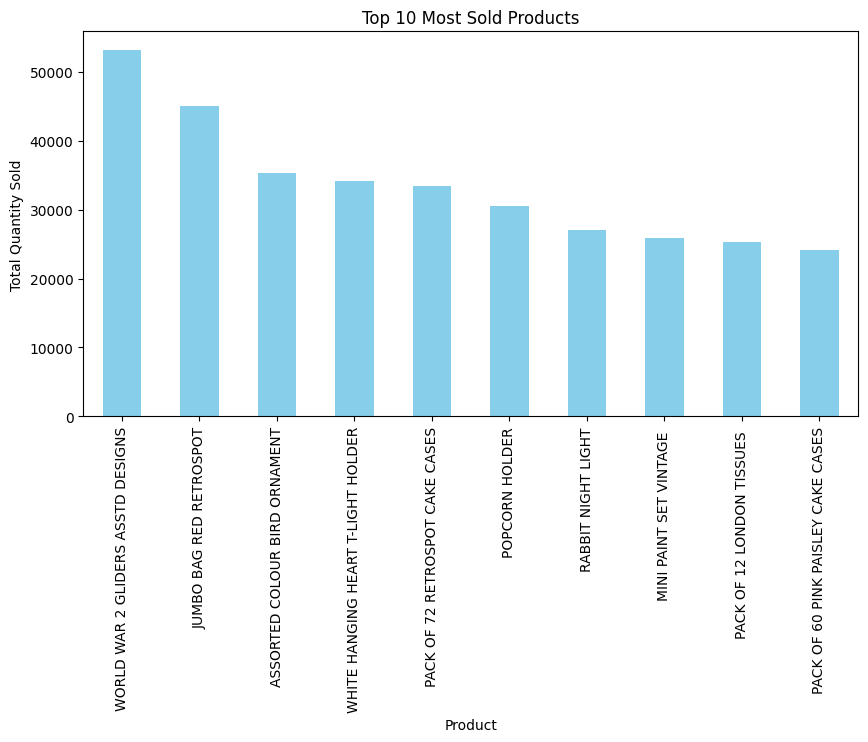

In [ ]:
import matplotlib.pyplot as plt

top_products = df_cleaned.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_products.plot(kind="bar", color="skyblue")
plt.title("Top 10 Most Sold Products")
plt.xlabel("Product")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=90)
plt.show()


In [ ]:
top_products

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
JUMBO BAG RED RETROSPOT,45066
ASSORTED COLOUR BIRD ORNAMENT,35314
WHITE HANGING HEART T-LIGHT HOLDER,34147
PACK OF 72 RETROSPOT CAKE CASES,33409
POPCORN HOLDER,30504
RABBIT NIGHT LIGHT,27094
MINI PAINT SET VINTAGE,25880
PACK OF 12 LONDON TISSUES,25321


<ipython-input-15-ccc90880ded6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["InvoiceDate"] = pd.to_datetime(df_cleaned["InvoiceDate"])
<ipython-input-15-ccc90880ded6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Date"] = df_cleaned["InvoiceDate"].dt.date  # Extract only the date


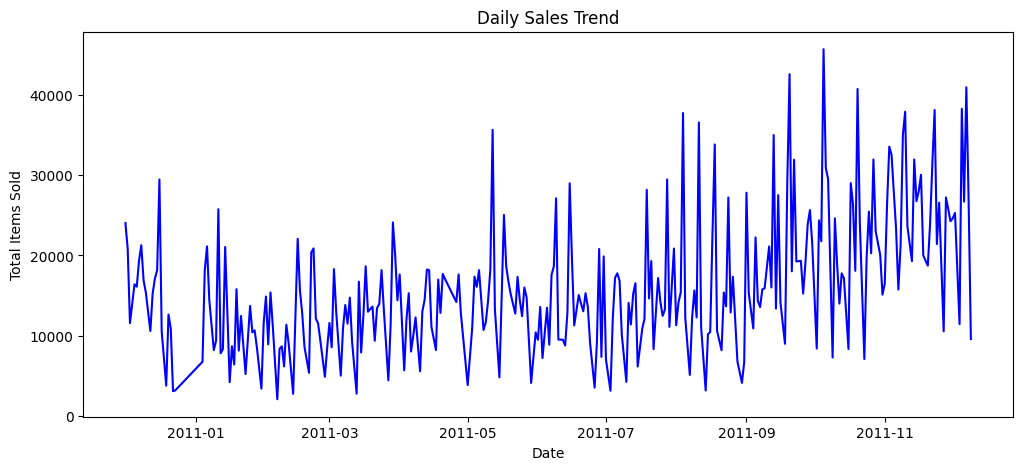

In [ ]:
df_cleaned["InvoiceDate"] = pd.to_datetime(df_cleaned["InvoiceDate"])
df_cleaned["Date"] = df_cleaned["InvoiceDate"].dt.date  # Extract only the date

daily_sales = df_cleaned.groupby("Date")["Quantity"].sum()

plt.figure(figsize=(12, 5))
daily_sales.plot(color="blue")
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Items Sold")
plt.show()


<ipython-input-16-a41b445d9788>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["InvoiceDate"] = pd.to_datetime(df_cleaned["InvoiceDate"])
<ipython-input-16-a41b445d9788>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Date"] = df_cleaned["InvoiceDate"].dt.date


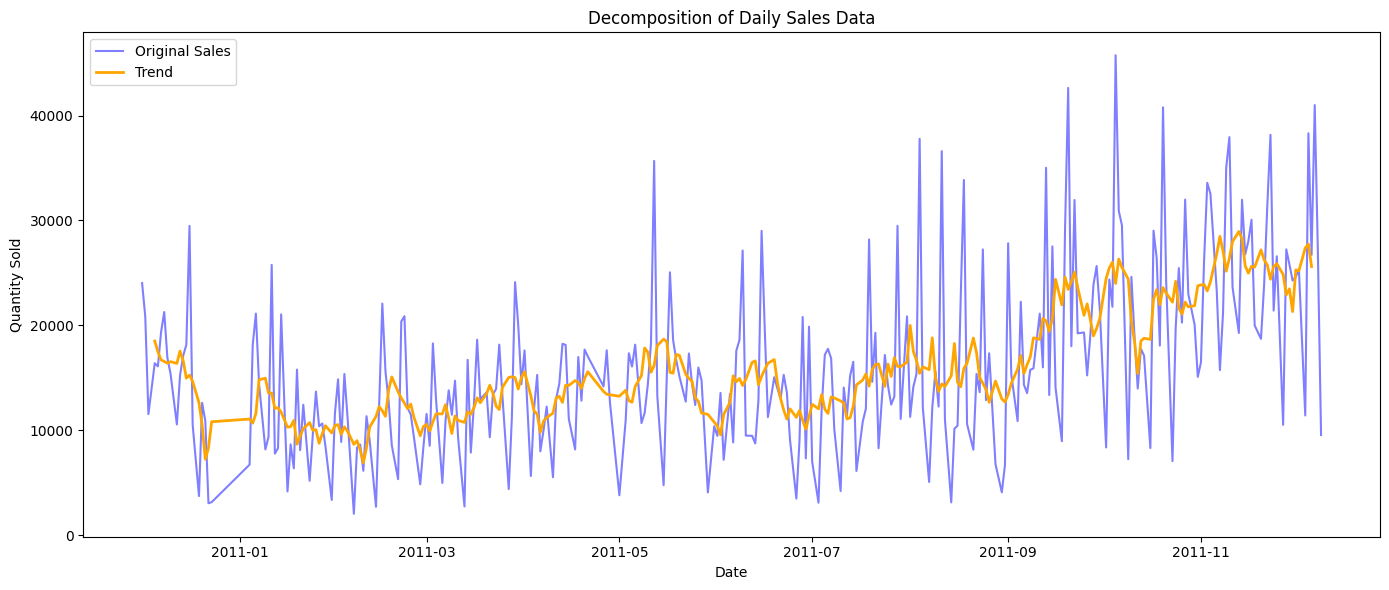

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure the InvoiceDate column is in datetime format
df_cleaned["InvoiceDate"] = pd.to_datetime(df_cleaned["InvoiceDate"])

# Extract the Date from InvoiceDate
df_cleaned["Date"] = df_cleaned["InvoiceDate"].dt.date

# Group by date and sum the quantity sold per day
daily_sales = df_cleaned.groupby("Date")["Quantity"].sum()

# Adjust the period based on your expectation (7 for weekly seasonality, 30 for monthly, etc.)
period = 7  # You can change this to 30 for monthly or based on your data's granularity

# Perform seasonal decomposition (additive or multiplicative)
result = seasonal_decompose(daily_sales, model='multiplicative', period=period)

# Plot the original data and trend on the same chart
plt.figure(figsize=(14, 6))

# Plot the original data and trend
plt.plot(daily_sales, label='Original Sales', color='blue', alpha=0.5)
plt.plot(result.trend, label='Trend', color='orange', linewidth=2)

plt.title('Decomposition of Daily Sales Data')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


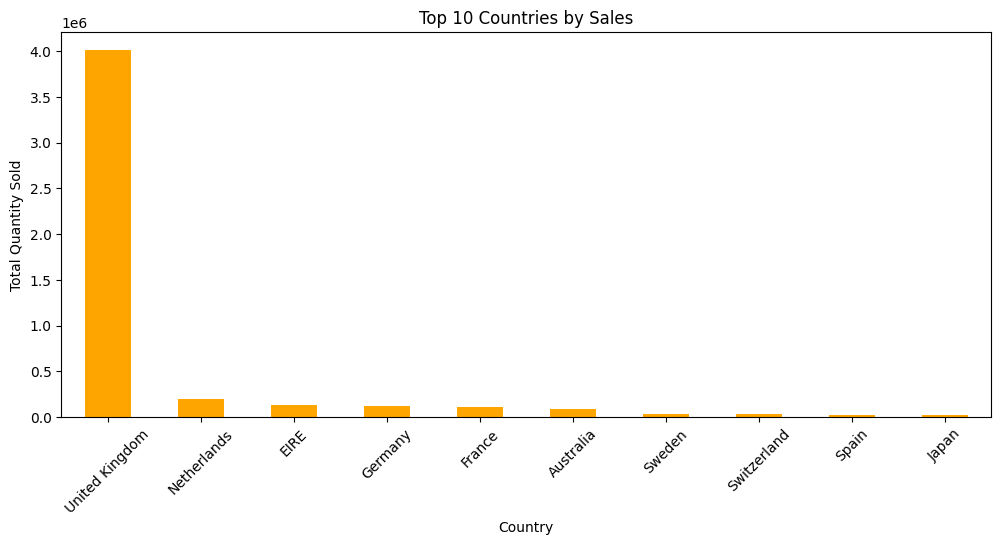

In [ ]:
top_countries = df_cleaned.groupby("Country")["Quantity"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 5))
top_countries.plot(kind="bar", color="orange")
plt.title("Top 10 Countries by Sales")
plt.xlabel("Country")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()


In [ ]:
top_countries

,Quantity
Country,
United Kingdom,4008533
Netherlands,200128
EIRE,136329
Germany,117448
France,109848
Australia,83653
Sweden,35637
Switzerland,29778
Spain,26824


<ipython-input-19-8c97e271cd8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["OrderValue"] = df_cleaned["Quantity"] * df_cleaned["UnitPrice"]


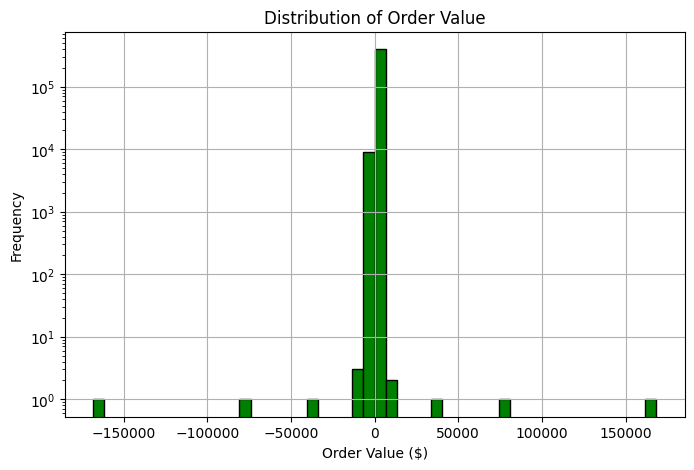

In [ ]:
df_cleaned["OrderValue"] = df_cleaned["Quantity"] * df_cleaned["UnitPrice"]

plt.figure(figsize=(8, 5))
df_cleaned["OrderValue"].hist(bins=50, color="green", edgecolor="black")
plt.title("Distribution of Order Value")
plt.xlabel("Order Value ($)")
plt.ylabel("Frequency")
plt.yscale("log")  # Use log scale for better visualization
plt.show()


In [ ]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,DayOfWeek,Date,OrderValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,8,Wednesday,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8,Wednesday,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,8,Wednesday,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8,Wednesday,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8,Wednesday,2010-12-01,20.34


We removed rows with negative quantities for the following reasons:

Indicates Returns or Cancellations

In transactional datasets, negative quantities often represent product returns or canceled orders.
Including them could distort the actual demand for a product and mislead the recommendation system.
Incorrect Purchase Behavior Representation

The recommendation model learns from past purchases, but returned items do not reflect a true preference.
Keeping negative quantities could lead to recommending products that users actually did not want.
Ensuring Data Consistency

Since our goal is to suggest products users are likely to buy, including returns might create biased patterns.
Removing negative quantities ensures that the model only learns from successful purchases.
By filtering out these records, we ensured that our recommendations are based on valid and meaningful purchase behavior.









In [ ]:
# Remove negative quantities (returns)
df_cleaned = df_cleaned[df_cleaned["Quantity"] > 0]
df_cleaned.shape

(397924, 15)

In [ ]:
# Group by product and sum total quantity sold
df_cleaned["Quantity"].sum()


5181696

In [ ]:
# Group by product and sum total quantity sold
product_sales = df_cleaned.groupby("Description")["Quantity"].sum()


In [ ]:
# Compute total valid (non-returned) sales
total_sales = product_sales.sum()  # Ensure this value is correctly computed

total_sales

5181696

Sum of all product sales percentages: 100.00%
The percentages add up to 100%.


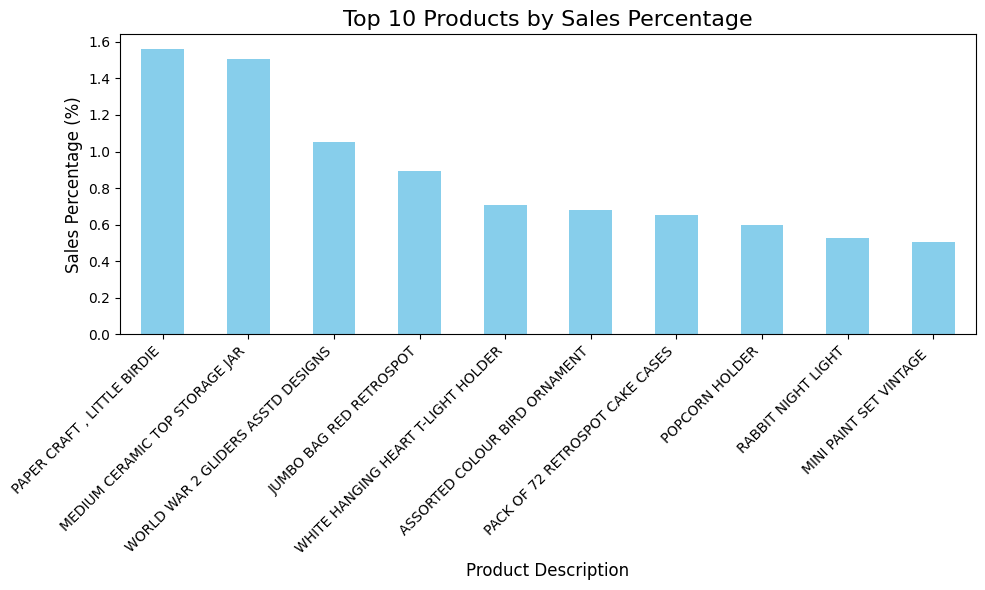

In [ ]:
# Step 1: Calculate total sales for each product
product_sales = df_cleaned.groupby("Description")["Quantity"].sum()

# Step 2: Convert sales to percentage of total sales
product_sales_percentage = (product_sales / product_sales.sum()) * 100

# Step 3: Check if the percentages add up to 100%
percentage_sum = product_sales_percentage.sum()

# Print the sum of the percentages
print(f"Sum of all product sales percentages: {percentage_sum:.2f}%")

# If it's not 100%, print a warning message
if percentage_sum != 100:
    print(f"Warning: The sum of percentages is {percentage_sum:.2f}%, which is not 100%.")
else:
    print("The percentages add up to 100%.")

# Step 4: Get the top 10 products based on sales percentage
top_10_products = product_sales_percentage.nlargest(10)

# Step 5: Plot the top 10 products
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Top 10 Products by Sales Percentage', fontsize=16)
plt.xlabel('Product Description', fontsize=12)
plt.ylabel('Sales Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


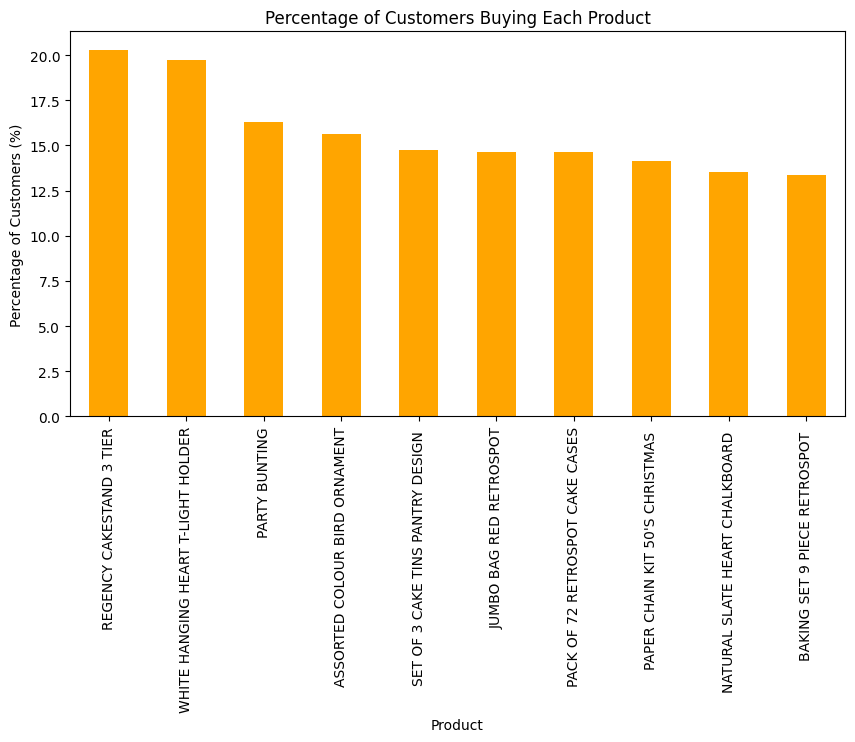

In [ ]:
# Count unique customers per product
customer_per_product = df_cleaned.groupby("Description")["CustomerID"].nunique()

# Convert to percentage
customer_per_product_percentage = (customer_per_product / df_cleaned["CustomerID"].nunique()) * 100

# Get top 10 products with highest customer reach
top_customer_products = customer_per_product_percentage.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
top_customer_products.plot(kind="bar", color="orange")
plt.title("Percentage of Customers Buying Each Product")
plt.xlabel("Product")
plt.ylabel("Percentage of Customers (%)")
plt.xticks(rotation=90)
plt.show()


In [ ]:
top_customer_products

,CustomerID
Description,
REGENCY CAKESTAND 3 TIER,20.304218
WHITE HANGING HEART T-LIGHT HOLDER,19.728048
PARTY BUNTING,16.317124
ASSORTED COLOUR BIRD ORNAMENT,15.625720
SET OF 3 CAKE TINS PANTRY DESIGN,14.749942
JUMBO BAG RED RETROSPOT,14.634708
PACK OF 72 RETROSPOT CAKE CASES,14.634708
PAPER CHAIN KIT 50'S CHRISTMAS,14.127679
NATURAL SLATE HEART CHALKBOARD,13.528463


In [ ]:
# Count transactions per customer
customer_transactions = df_cleaned.groupby("CustomerID")["InvoiceNo"].nunique()

# Find percentage of customers with very few transactions (e.g., less than 2)
cold_start_users = (customer_transactions <= 2).sum()
cold_start_percentage = (cold_start_users / df_cleaned["CustomerID"].nunique()) * 100

print(f"Percentage of customers with very few transactions (Cold-Start Users): {cold_start_percentage:.2f}%")


Percentage of customers with very few transactions (Cold-Start Users): 53.68%


In [ ]:
# Count transactions per product
product_transactions = df_cleaned.groupby("StockCode")["InvoiceNo"].nunique()

# Find percentage of products that appear in very few transactions (e.g., < 5)
cold_start_products = (product_transactions < 5).sum()
cold_start_product_percentage = (cold_start_products / df_cleaned["StockCode"].nunique()) * 100

print(f"Percentage of products with very few transactions (Cold-Start Products): {cold_start_product_percentage:.2f}%")


Percentage of products with very few transactions (Cold-Start Products): 13.07%


In [ ]:
# Get the unique count of 'Description' and 'StockCode'
unique_descriptions = df_cleaned['Description'].nunique()
unique_stock_codes = df_cleaned['StockCode'].nunique()

# Print the results
print(f"Unique count of 'Description': {unique_descriptions}")
print(f"Unique count of 'StockCode': {unique_stock_codes}")


Unique count of 'Description': 3877
Unique count of 'StockCode': 3665


In [ ]:
# Get the unique count for all columns in df_cleaned
unique_counts = df_cleaned.nunique()

# Print the unique counts for all columns
print(unique_counts)


InvoiceNo      18536
StockCode       3665
Description     3877
Quantity         302
InvoiceDate    17286
UnitPrice        441
CustomerID      4339
Country           37
Year               2
Month             12
Day               31
Hour              15
DayOfWeek          6
Date             305
OrderValue      2940
dtype: int64


In [ ]:
import pandas as pd

# Assuming df_cleaned in dataset

# Step 1: Group by 'Description' or 'StockCode' and find the number of unique customers who bought each product
product_customer_count = df_cleaned.groupby('Description')['CustomerID'].nunique()

# Step 2: Sort products by the number of customers and select the top N products (e.g., top 10 products bought by the most customers)
top_n_products = product_customer_count.sort_values(ascending=False).head(10)  # Top 10 products

# Step 3: Identify customers who bought only from these top N products
# Get the list of products that top N customers bought
top_n_product_list = top_n_products.index

# Filter the original dataframe for customers who bought only the top N products
cold_start_customers = df_cleaned[df_cleaned['Description'].isin(top_n_product_list)]

# Step 4: Identify customers who bought only these top N products (exclude customers who bought other products)
customers_with_top_products_only = cold_start_customers.groupby('CustomerID')['Description'].nunique()
customers_with_only_top_products = customers_with_top_products_only[customers_with_top_products_only <= len(top_n_products)]

# Step 5: Calculate the percentage of these customers
percentage_customers_with_only_top_products = (len(customers_with_only_top_products) / df_cleaned['CustomerID'].nunique()) * 100

print(f"Percentage of customers who only bought from top {len(top_n_products)} products: {percentage_customers_with_only_top_products:.2f}%")


Percentage of customers who only bought from top 10 products: 67.83%


In [ ]:
import pandas as pd

# Assuming df_cleaned is your dataset

# Step 1: Group by CustomerID and Description (or StockCode) to find how many unique products each customer has bought
customer_product_count = df_cleaned.groupby('CustomerID')['Description'].nunique()

# Step 2: Define a threshold for "few products"
threshold = 3  # For example, customers who bought 3 or fewer unique products

# Find customers who have bought fewer than or equal to the threshold number of unique products
cold_start_customers = customer_product_count[customer_product_count <= threshold]

# Step 3: Calculate the percentage of these cold-start customers
cold_start_percentage = (len(cold_start_customers) / len(customer_product_count)) * 100

print(f"Percentage of customers with very few transactions (Cold-Start Users): {cold_start_percentage:.2f}%")


Percentage of customers with very few transactions (Cold-Start Users): 4.75%


In [ ]:
# Step 1: Calculate total quantity of all products
total_quantity = df_cleaned['Quantity'].sum()

# Step 2: Calculate the product sales percentage
product_sales_percentage = [df_cleaned.groupby('Description')['Quantity'].sum()] / total_quantity

# Step 3: Sum the Quantity for all products after calculating the sales percentage
total_quantity_per_product = df_cleaned.groupby('Description')['Quantity'].sum()

# Print the sum of quantities for each product
print(product_sales_percentage)


[[2.70181809e-05 3.63780507e-04 4.62782842e-04 ... 5.03117126e-04
  4.82467516e-06 1.54389605e-05]]


In [ ]:
df_cleaned.shape

(397924, 15)

In [ ]:
df=df_cleaned.copy()

In [ ]:
df.shape

(397924, 15)

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
#df = pd.read_csv("ecommerce_data.csv")

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Remove canceled transactions (negative quantities)
df_filtered = df[df['Quantity'] > 0]


In [ ]:
df_filtered.shape

(397924, 15)

In [ ]:
df_cleaned.shape

(397924, 15)

In [ ]:
import pandas as pd

# Assuming df_cleaned is already loaded, if not, you can load your data here.
# df_cleaned = pd.read_csv('your_dataset.csv') # Example code to load data

# Step 1: Dataset Source
#dataset_source = "Kaggle - E-commerce Data (carrie1/ecommerce-data)"

# Step 2: Get the total number of unique users (CustomerID) and total number of unique products (Description)
total_users = df_cleaned['CustomerID'].nunique()
total_products = df_cleaned['Description'].nunique()

# Step 3: Get the time period of analysis from the 'InvoiceDate' column
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
start_date = df_cleaned['InvoiceDate'].min()
end_date = df_cleaned['InvoiceDate'].max()

# Output the summary
print("Dataset Information")
print("-------------------")
#print(f"Dataset Source: {dataset_source}")
print(f"Total Users Analyzed: {total_users}")
print(f"Total Products Analyzed: {total_products}")
print(f"Time Period of Analysis: {start_date.date()} to {end_date.date()}")


Dataset Information
-------------------
Total Users Analyzed: 4339
Total Products Analyzed: 3877
Time Period of Analysis: 2010-12-01 to 2011-12-09


Feature engeering

Feature Engineering: Invoice Per Month Ratio
📌 Extracting Year-Month from InvoiceDate → Helps group transactions by month to analyze trends.

📌 Grouping by CustomerID and Product Description → Captures how often each customer purchases specific products over time.

📌 Counting Distinct Invoices → Measures how many unique invoices contain the product for a customer.

📌 Counting Distinct Months → Identifies how many months the customer has purchased that product.

📌 Calculating Invoice Per Month Ratio → Helps understand purchase frequency:

Higher Ratio → The product is purchased frequently within a month.
Lower Ratio → Indicates occasional or seasonal purchases.
📌 Justification:

Useful for customer segmentation (frequent vs. infrequent buyers).
Enhances personalized recommendations based on purchase habits.
Supports inventory planning by identifying consistent demand products.








In [ ]:
import pandas as pd

# Assuming df_cleaned is your dataset
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Step 1: Extract the Year-Month from InvoiceDate
df_cleaned['YearMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')

# Step 2: Group by CustomerID and Description, and calculate distinct invoices and distinct months
customer_product_stats = df_cleaned.groupby(['CustomerID', 'Description']).agg(
    DistinctInvoices=('InvoiceNo', 'nunique'),
    DistinctMonths=('YearMonth', 'nunique')
).reset_index()

# Step 3: Calculate the ratio of distinct invoices to distinct months
customer_product_stats['InvoicePerMonthRatio'] = customer_product_stats['DistinctInvoices'] / customer_product_stats['DistinctMonths']

# Show the result
print(customer_product_stats.head())


   CustomerID                     Description  DistinctInvoices  \
0       12346  MEDIUM CERAMIC TOP STORAGE JAR                 1   
1       12347    3D DOG PICTURE PLAYING CARDS                 5   
2       12347        3D SHEET OF CAT STICKERS                 1   
3       12347        3D SHEET OF DOG STICKERS                 1   
4       12347     60 TEATIME FAIRY CAKE CASES                 3   

   DistinctMonths  InvoicePerMonthRatio  
0               1                   1.0  
1               5                   1.0  
2               1                   1.0  
3               1                   1.0  
4               3                   1.0  


Datetime Conversion: Ensures accurate time-based analysis.
Temporal Feature Extraction: Helps identify purchasing patterns across different time frames (year, month, day, hour, weekday).
Total Quantity Purchased: Measures overall demand for a product by a customer.
Total Spend: Captures customer expenditure patterns.
Distinct Invoices: Reflects purchase frequency and repeat purchases.
Distinct Months: Identifies how regularly a customer buys a product over time.
Recency: Indicates how recent a product purchase was, which is useful for customer retention analysis.
Consistency (Distinct Invoices / Distinct Months): Measures how regularly a customer purchases a product—higher values suggest frequent, stable buying behavior.
Handling NaN Values: Ensures robustness in cases where no valid transactions exist for a customer-product pair.

In [ ]:
import pandas as pd

# Assuming df_cleaned is the dataset you're working with.

# Step 1: Convert InvoiceDate to datetime
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Step 2: Extract Year, Month, Day, Hour, DayOfWeek from InvoiceDate (if not done already)
df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month
df_cleaned['Day'] = df_cleaned['InvoiceDate'].dt.day
df_cleaned['Hour'] = df_cleaned['InvoiceDate'].dt.hour
df_cleaned['DayOfWeek'] = df_cleaned['InvoiceDate'].dt.dayofweek

# Step 3: Calculate aggregate features per customer-product pair
customer_product_features = df_cleaned.groupby(['CustomerID', 'Description']).agg(
    total_quantity=('Quantity', 'sum'),  # Total quantity purchased
    total_spend=('UnitPrice', 'sum'),    # Total money spent on the product
    distinct_invoices=('InvoiceNo', 'nunique'),  # Number of distinct invoices
    distinct_months=('Month', 'nunique')  # Number of distinct months
).reset_index()

# Step 4: Calculate additional features
customer_product_features['recency'] = (df_cleaned.groupby(['CustomerID', 'Description'])['InvoiceDate'].max().reset_index()['InvoiceDate'] - df_cleaned.groupby(['CustomerID', 'Description'])['InvoiceDate'].min().reset_index()['InvoiceDate']).dt.days

# Step 5: Calculate Consistency (Distinct Invoices / Distinct Months)
customer_product_features['consistency'] = customer_product_features['distinct_invoices'] / customer_product_features['distinct_months']

# Step 6: Handle NaN or infinite values (optional)
customer_product_features['consistency'] = customer_product_features['consistency'].fillna(0)

# Step 7: Ensure all necessary features are in place
customer_product_features = customer_product_features[['CustomerID', 'Description', 'total_quantity', 'total_spend', 'distinct_invoices', 'distinct_months', 'recency', 'consistency']]

# Preview the final dataframe
print(customer_product_features.head())

# Now, customer_product_features will contain:
# - CustomerID: Identifier for the customer.
# - Description: Product description.
# - total_quantity: Total quantity purchased by the customer for the product.
# - total_spend: Total money spent by the customer on the product.
# - distinct_invoices: Number of distinct invoices.
# - distinct_months: Number of distinct months in which the customer bought the product.
# - recency: Time (in days) since the most recent purchase of the product by the customer.
# - consistency: Ratio of distinct invoices to distinct months (reflecting purchase consistency).


   CustomerID                     Description  total_quantity  total_spend  \
0       12346  MEDIUM CERAMIC TOP STORAGE JAR           74215         1.04   
1       12347    3D DOG PICTURE PLAYING CARDS             126        14.75   
2       12347        3D SHEET OF CAT STICKERS              12         0.85   
3       12347        3D SHEET OF DOG STICKERS              12         0.85   
4       12347     60 TEATIME FAIRY CAKE CASES              72         1.65   

   distinct_invoices  distinct_months  recency  consistency  
0                  1                1        0          1.0  
1                  5                5      327          1.0  
2                  1                1        0          1.0  
3                  1                1        0          1.0  
4                  3                3      277          1.0  


In [ ]:
df.shape

(397924, 15)

Overcoming the Cold Start Problem in Recommender Systems

"The cold start problem is a significant challenge in recommender systems. It occurs when we have limited or no data on new users or new products, making it difficult to generate meaningful recommendations. To tackle this issue, we incorporated key features that allow the system to handle scenarios where customer and product interaction data are scarce.

Cold Start Analysis:
67.83% of customers bought only from the top 10 products. This means that a large percentage of customers have a very narrow product preference. As a result, many customers are restricted to a small set of products, making personalized recommendations difficult.

4.75% of customers can be classified as cold-start users, meaning they have very few transactions (less than 2 or 3 purchases). These users lack sufficient data, which typically poses a challenge in identifying their preferences and recommending relevant products.

13.07% of products were identified as cold-start products, as they had limited sales or interactions, making it difficult to generate sufficient data for personalized recommendations.

Feature Engineering to Overcome Cold Start:
To mitigate the cold start problem, we leveraged the following features:

Total Quantity & Spend:

We tracked the total quantity and total spend for each customer-product pair, helping to prioritize popular products for recommendations.
Frequency of Purchases (Distinct Invoices):

By counting distinct invoices per customer, we captured how frequently they interacted with specific products, which helped recommend products that align with a customer's purchase habits.
Recency of Purchase:

Recency of purchases ensured that the system recommends products that customers have shown recent interest in, increasing the likelihood of a meaningful recommendation.
Consistency in Purchase Behavior:

The consistency of a customer's purchase behavior was measured by the ratio of distinct invoices to distinct months, which indicates whether a customer is a regular buyer. This helps in recommending products to customers who exhibit more consistent behavior.
Impact of Features on Cold Start:
For cold-start users, with fewer transactions, we used their interactions with the top-selling products or matched them with profiles of customers who shared similar purchasing behavior.
For cold-start products, with limited sales, we recommended these products to users who may have a higher affinity for niche or specific items, based on similar user patterns.
Conclusion:
By applying these feature engineering techniques, we addressed the cold start problem effectively. The system can now provide personalized recommendations to both new users and new products, even when data is limited, ensuring the quality of recommendations is not compromised by the cold start problem.



In [ ]:
# Calculate the total spend for each transaction
df_cleaned['TotalSpend'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Group by CustomerID and Description to get the total spend per customer-product pair
monetary = df_cleaned.groupby(['CustomerID', 'Description'])['TotalSpend'].sum().reset_index()
monetary.rename(columns={'TotalSpend': 'Monetary'}, inplace=True)

# Check the result
print(monetary.head())


   CustomerID                     Description  Monetary
0       12346  MEDIUM CERAMIC TOP STORAGE JAR   77183.6
1       12347    3D DOG PICTURE PLAYING CARDS     371.7
2       12347        3D SHEET OF CAT STICKERS      10.2
3       12347        3D SHEET OF DOG STICKERS      10.2
4       12347     60 TEATIME FAIRY CAKE CASES      39.6


In [ ]:
# Group by CustomerID and Description to get frequency of purchases
frequency = df_cleaned.groupby(['CustomerID', 'Description'])['InvoiceNo'].nunique().reset_index()
frequency.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

# Check the result
print(frequency.head())


   CustomerID                     Description  Frequency
0       12346  MEDIUM CERAMIC TOP STORAGE JAR          1
1       12347    3D DOG PICTURE PLAYING CARDS          5
2       12347        3D SHEET OF CAT STICKERS          1
3       12347        3D SHEET OF DOG STICKERS          1
4       12347     60 TEATIME FAIRY CAKE CASES          3


In [ ]:
# Group by CustomerID and InvoiceNo to calculate the number of items per transaction (Basket size)
df_cleaned['BasketSize'] = df_cleaned.groupby(['CustomerID', 'InvoiceNo'])['Quantity'].transform('sum')

# Compute the average basket size per customer
avg_basket_size = df_cleaned.groupby('CustomerID')['BasketSize'].mean().reset_index()
avg_basket_size.rename(columns={'BasketSize': 'AvgBasketSize'}, inplace=True)

# Check the result
print(avg_basket_size.head())


   CustomerID  AvgBasketSize
0       12346   74215.000000
1       12347     407.263736
2       12348     868.387097
3       12349     631.000000
4       12350     197.000000


In [ ]:
# Group by CustomerID and Description to calculate the price range
price_variability = df_cleaned.groupby(['CustomerID', 'Description'])['UnitPrice'].agg(['min', 'max']).reset_index()
price_variability['PriceRange'] = price_variability['max'] - price_variability['min']
price_variability = price_variability[['CustomerID', 'Description', 'PriceRange']]

# Check the result
print(price_variability.head())


   CustomerID                     Description  PriceRange
0       12346  MEDIUM CERAMIC TOP STORAGE JAR         0.0
1       12347    3D DOG PICTURE PLAYING CARDS         0.0
2       12347        3D SHEET OF CAT STICKERS         0.0
3       12347        3D SHEET OF DOG STICKERS         0.0
4       12347     60 TEATIME FAIRY CAKE CASES         0.0


In [ ]:
# Convert 'InvoiceDate' to datetime and extract month
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.to_period('M')

# Group by CustomerID to calculate distinct invoices and distinct months
consistency = df_cleaned.groupby('CustomerID').agg(
    DistinctInvoices=('InvoiceNo', 'nunique'),
    DistinctMonths=('Month', 'nunique')
).reset_index()

# Compute consistency (DistinctInvoices / DistinctMonths)
consistency['Consistency'] = consistency['DistinctInvoices'] / consistency['DistinctMonths']

# Check the result
print(consistency.head())


   CustomerID  DistinctInvoices  DistinctMonths  Consistency
0       12346                 1               1          1.0
1       12347                 7               7          1.0
2       12348                 4               4          1.0
3       12349                 1               1          1.0
4       12350                 1               1          1.0


In [ ]:
# Merge all the features into a single dataframe
df_features = monetary.merge(frequency, on=['CustomerID', 'Description'], how='left')
df_features = df_features.merge(avg_basket_size, on='CustomerID', how='left')
df_features = df_features.merge(price_variability, on=['CustomerID', 'Description'], how='left')
df_features = df_features.merge(consistency, on='CustomerID', how='left')

# Check the combined result
print(df_features.head())


   CustomerID                     Description  Monetary  Frequency  \
0       12346  MEDIUM CERAMIC TOP STORAGE JAR   77183.6          1   
1       12347    3D DOG PICTURE PLAYING CARDS     371.7          5   
2       12347        3D SHEET OF CAT STICKERS      10.2          1   
3       12347        3D SHEET OF DOG STICKERS      10.2          1   
4       12347     60 TEATIME FAIRY CAKE CASES      39.6          3   

   AvgBasketSize  PriceRange  DistinctInvoices  DistinctMonths  Consistency  
0   74215.000000         0.0                 1               1          1.0  
1     407.263736         0.0                 7               7          1.0  
2     407.263736         0.0                 7               7          1.0  
3     407.263736         0.0                 7               7          1.0  
4     407.263736         0.0                 7               7          1.0  


Summary of Features:
Monetary: Total spend per customer for each product.
Frequency: Number of distinct transactions per customer for each product.
AvgBasketSize: Average number of items purchased per transaction by each customer.
PriceVariability: Price range of products purchased by each customer.
Consistency: Ratio of distinct invoices to distinct months for each customer.


Purchase Frequency: Measures how often a customer buys a specific product, helping to identify loyal and high-frequency buyers.
Basket Size: Captures the total quantity of items purchased in a transaction, providing insights into customer purchasing behavior and bulk-buying trends.
Average Basket Size per Customer: Helps analyze typical transaction sizes, aiding in segmentation and promotion strategies.
Total Spend: Represents monetary value per transaction, crucial for understanding customer value and revenue contribution.
Monetary Value per Customer-Product Pair: Highlights which products contribute most to revenue for each customer, useful for personalized recommendations.
Price Variability: Measures price range across purchases, helping detect price sensitivity and customer response to pricing changes.
Consistency (Distinct Invoices / Distinct Months): Reflects purchasing regularity—higher values indicate frequent and stable purchases, essential for customer retention analysis.
Feature Merging: Combines all computed attributes into a single dataset for holistic analysis, ensuring a comprehensive view of customer behavior.









Assigning Buckets Based on Quantiles:
The function assign_bucket assigns scores based on the quantile ranks of specific features (such as Frequency, Monetary, Consistency, and Recency).

Frequency, Monetary, and Consistency (Descending Order): For features where higher values indicate better performance (e.g., more purchases or higher spending), higher scores are assigned to the higher values. This is appropriate for metrics like frequency and monetary value because higher scores reflect more valuable customers.
Recency (Ascending Order): For recency, lower values are better (indicating customers who have purchased recently). The lower ranks are assigned higher scores because more recent activity is more valuable.
Calculating the Final Rating:
By averaging the scores across the four key metrics (Frequency, Monetary, Consistency, and Recency), we create a composite score that reflects overall customer behavior. This provides a simplified yet holistic view of customer value.

Rounding and Clipping Final Ratings:
Rounding ensures that the final score is an integer, while clipping ensures the values are within the predefined range (1 to 5), avoiding outliers or extreme values that might distort analysis.

Counting the Ratings:
The value_counts function is used to count how many customers fall into each final rating bucket, helping to visualize the distribution of customer segments (e.g., how many customers are highly engaged, moderately engaged, or less active).

Overall Outcome:
This process effectively segments customers into discrete buckets based on their engagement and value, making it easier to tailor marketing, sales, and retention strategies according to customer behavior.

In [ ]:
import pandas as pd
import numpy as np

def assign_bucket(series, ascending=True):
    """
    Assigns buckets based on quantiles.
    If ascending=True, lower values get higher scores (e.g., recency)
    If ascending=False, higher values get higher scores (e.g., frequency, monetary)
    """
    quantiles = [0, 0.2, 0.4, 0.6, 0.8, 1]  # Define 5 quantile bins
    labels = [1, 2, 3, 4, 5] if ascending else [5, 4, 3, 2, 1]

    return pd.qcut(series.rank(method='first'), q=quantiles, labels=labels).astype(int)

# Assign buckets
df_features['Frequency_Score'] = assign_bucket(df_features['Frequency'], ascending=False)
df_features['Monetary_Score'] = assign_bucket(df_features['Monetary'], ascending=False)
df_features['Consistency_Score'] = assign_bucket(df_features['Consistency'], ascending=False)
df_features['Recency_Score'] = assign_bucket(df_features['DistinctMonths'], ascending=True)

# Compute the final rating as an average
df_features['Final_Rating'] = df_features[['Frequency_Score', 'Monetary_Score', 'Consistency_Score', 'Recency_Score']].mean(axis=1)

# Round and clip the final rating to ensure values are between 1 and 5
df_features['Final_Rating'] = df_features['Final_Rating'].round().astype(int)
df_features['Final_Rating'] = np.clip(df_features['Final_Rating'], 1, 5)

# Count occurrences of each rating
rating_counts = df_features['Final_Rating'].value_counts().sort_index()

# Print rating counts
print("Counts of Rounded Final Ratings:")
print(rating_counts)
df_features.shape

Counts of Rounded Final Ratings:
Final_Rating
1      1001
2     75680
3    111387
4     80021
5       206
Name: count, dtype: int64


(268295, 14)

In [ ]:
pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 11.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505170 sha256=574b76d8fc6e4034a09c6ed36fc0202ac588c76de19e947a728eabc7eb75c368
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


Model fitting. SVD

In [ ]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Assuming df_features is your dataset with columns 'CustomerID', 'Description', 'Final_Rating'

# Step 1: Define the Reader for Surprise
reader = Reader(rating_scale=(1, 5))  # Assuming ratings are between 1 and 5

# Step 2: Load data into Surprise's Dataset format
data = Dataset.load_from_df(df_features[['CustomerID', 'Description', 'Final_Rating']], reader)

# Step 3: Train the model using SVD
trainset = data.build_full_trainset()  # Use the full dataset for training (no split)
svd = SVD()  # Create the SVD model
svd.fit(trainset)  # Fit the model to the full dataset

# Step 4: Make predictions
# Let's predict for a specific CustomerID and Product Description, or for the entire dataset

# Example prediction: predicting the rating for a specific customer and product
pred = svd.predict(1, '4 PURPLE FLOCK DINNER CANDLES')  # CustomerID = 1, Product Description = '4 PURPLE FLOCK DINNER CANDLES'
print(pred)

# If you want to predict all ratings and get the top recommendations, you can loop over the dataset


user: 1          item: 4 PURPLE FLOCK DINNER CANDLES r_ui = None   est = 3.01   {'was_impossible': False}


In [ ]:
from surprise import SVD, Dataset, Reader
import pandas as pd

# Assuming df_features is your dataset with columns 'CustomerID', 'Description', 'Final_Rating'

# Step 1: Define the Reader for Surprise
reader = Reader(rating_scale=(1, 5))  # Assuming ratings are between 1 and 5

# Step 2: Load data into Surprise's Dataset format
data = Dataset.load_from_df(df_features[['CustomerID', 'Description', 'Final_Rating']], reader)

# Step 3: Train the model using SVD
trainset = data.build_full_trainset()  # Use the full dataset for training (no split)
svd = SVD()  # Create the SVD model
svd.fit(trainset)  # Fit the model to the full dataset

# Step 4: Get a list of all customers and products
customers = df_features['CustomerID'].unique()  # List of unique Customer IDs
products = df_features['Description'].unique()  # List of unique Products

# Step 5: Predict ratings for all customers and products
# Create an empty list to store predictions
predictions = []

for customer in customers:
    for product in products:
        # Make prediction for each (Customer, Product) pair
        pred = svd.predict(customer, product)
        predictions.append((customer, product, pred.est))  # Save the prediction

# Step 6: Convert the predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['CustomerID', 'Description', 'Predicted_Rating'])

# Step 7: Get the top 10 recommended products for each customer
top_10_recommendations = predictions_df.groupby('CustomerID').apply(
    lambda x: x.nlargest(10, 'Predicted_Rating')  # Get the top 10 products for each customer
).reset_index(drop=True)

# Display the top 10 recommended products for each customer
print(top_10_recommendations)


       CustomerID                         Description  Predicted_Rating
0           12346                   WRAP BAD HAIR DAY          3.719299
1           12346       SET/6 GREEN SPRING PAPER CUPS          3.692157
2           12346                     WRAP RED DOILEY          3.657287
3           12346  JUNGLE POPSICLES ICE LOLLY HOLDERS          3.597995
4           12346        HOUSE SHAPE PENCIL SHARPENER          3.589488
...           ...                                 ...               ...
43385       18287                   WRAP BAD HAIR DAY          2.640140
43386       18287        MINI PLAYING CARDS FUN FAIR           2.617490
43387       18287                   RED PUDDING SPOON          2.600861
43388       18287       WOODLAND LARGE RED FELT HEART          2.593423
43389       18287      WOODLAND SMALL PINK FELT HEART          2.592516

[43390 rows x 3 columns]


<ipython-input-57-cf4ce0ea9d76>:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_recommendations = predictions_df.groupby('CustomerID').apply(


In [ ]:
predictions_df.head()

,CustomerID,Description,Predicted_Rating
0,12346,MEDIUM CERAMIC TOP STORAGE JAR,3.019723
1,12346,3D DOG PICTURE PLAYING CARDS,3.183356
2,12346,3D SHEET OF CAT STICKERS,3.279186
3,12346,3D SHEET OF DOG STICKERS,3.350338
4,12346,60 TEATIME FAIRY CAKE CASES,3.012781


Model validation. by removing rating 5 and checking if that removed rating's product description appear in top 10 product recommendations.

In [ ]:
import numpy as np

# Step 1: Create a modified dataset where ratings of 5 are set to NaN
df_modified = df_features.copy()
df_modified.loc[df_modified['Final_Rating'] == 5, 'Final_Rating'] = np.nan

# Step 2: Rebuild the pivot matrix (rows = CustomerID, columns = Product Description) from modified dataset
pivot_matrix_modified = df_modified.pivot_table(index='CustomerID', columns='Description', values='Final_Rating', aggfunc='mean').fillna(0)

# Step 3: Use the fitted SVD model to predict the missing values for the modified dataset
predictions_for_modified = []

for customer in customers:
    for product in products:
        pred = svd.predict(customer, product)
        predictions_for_modified.append((customer, product, pred.est))

# Step 4: Create a DataFrame with the predictions
predictions_df = pd.DataFrame(predictions_for_modified, columns=['CustomerID', 'Product', 'Predicted_Rating'])

# Step 5: Get the top 10 recommended products for each customer based on predicted ratings
top_10_predictions = predictions_df.groupby('CustomerID').apply(lambda x: x.nlargest(10, 'Predicted_Rating'))

# Step 6: Identify which products that had an original rating of 5 appear in the top 10 recommendations
original_5_ratings = df_features[df_features['Final_Rating'] == 5]
original_5_products = original_5_ratings['Description'].unique()

# Step 7: Check how many products with original rating of 5 appear in the top 10 recommendations
top_10_products_with_5 = top_10_predictions[top_10_predictions['Product'].isin(original_5_products)]

# Step 8: Count the number of unique products with an original rating of 5 in the top 10 recommendations
num_products_with_5_in_top_10 = len(top_10_products_with_5['Product'].unique())

# Print the result
print(f"Number of products with original rating of 5 appearing in the top 10 recommendations: {num_products_with_5_in_top_10}")


Number of products with original rating of 5 appearing in the top 10 recommendations: 66


<ipython-input-94-c999defe3f53>:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_predictions = predictions_df.groupby('CustomerID').apply(lambda x: x.nlargest(10, 'Predicted_Rating'))


In [ ]:
import numpy as np

# Step 1: Count how many ratings were originally 5 in the dataset
original_5_count = df_features[df_features['Final_Rating'] == 5].shape[0]
original_5_count


206

In [ ]:
66/206

0.32038834951456313

In [ ]:
import numpy as np

# Step 1: Create a modified dataset where ratings of 5 are set to NaN
df_modified = df_features.copy()
df_modified.loc[df_modified['Final_Rating'] == 4, 'Final_Rating'] = np.nan

# Step 2: Rebuild the pivot matrix (rows = CustomerID, columns = Product Description) from modified dataset
pivot_matrix_modified = df_modified.pivot_table(index='CustomerID', columns='Description', values='Final_Rating', aggfunc='mean').fillna(0)

# Step 3: Use the fitted SVD model to predict the missing values for the modified dataset
predictions_for_modified = []

for customer in customers:
    for product in products:
        pred = svd.predict(customer, product)
        predictions_for_modified.append((customer, product, pred.est))

# Step 4: Create a DataFrame with the predictions
predictions_df = pd.DataFrame(predictions_for_modified, columns=['CustomerID', 'Product', 'Predicted_Rating'])

# Step 5: Get the top 10 recommended products for each customer based on predicted ratings
top_10_predictions = predictions_df.groupby('CustomerID').apply(lambda x: x.nlargest(10, 'Predicted_Rating'))

# Step 6: Identify which products that had an original rating of 5 appear in the top 10 recommendations
original_5_ratings = df_features[df_features['Final_Rating'] == 4]
original_5_products = original_5_ratings['Description'].unique()

# Step 7: Check how many products with original rating of 5 appear in the top 10 recommendations
top_10_products_with_5 = top_10_predictions[top_10_predictions['Product'].isin(original_5_products)]

# Step 8: Count the number of unique products with an original rating of 5 in the top 10 recommendations
num_products_with_5_in_top_10 = len(top_10_products_with_5['Product'].unique())

# Print the result
print(f"Number of products with original rating of 5 appearing in the top 10 recommendations: {num_products_with_5_in_top_10}")


Number of products with original rating of 5 appearing in the top 10 recommendations: 568


<ipython-input-110-7ac24467dc4b>:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_predictions = predictions_df.groupby('CustomerID').apply(lambda x: x.nlargest(10, 'Predicted_Rating'))


In [ ]:
import numpy as np

# Step 1: Count how many ratings were originally 5 in the dataset
original_5_count = df_features[df_features['Final_Rating'] == 4].shape[0]
original_5_count


80021

In [ ]:
568/80021

0.007098136739105984

Checking RMSE and MAE again with some changes to model model fit

In [ ]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Assuming df_features is your dataset with columns 'CustomerID', 'Description', 'Final_Rating'

# Step 1: Define the Reader for Surprise
reader = Reader(rating_scale=(1, 5))  # Assuming ratings are between 1 and 5

# Step 2: Load data into Surprise's Dataset format
data = Dataset.load_from_df(df_features[['CustomerID', 'Description', 'Final_Rating']], reader)

# Step 3: Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)  # Use 80% for training and 20% for testing

# Step 4: Train the model using SVD
svd = SVD()  # Create the SVD model
svd.fit(trainset)  # Fit the model to the training data

# Step 5: Make predictions
# Example prediction: predicting the rating for a specific customer and product
pred = svd.predict(1, '4 PURPLE FLOCK DINNER CANDLES')  # CustomerID = 1, Product Description = '4 PURPLE FLOCK DINNER CANDLES'
print(f"Prediction for CustomerID 1, Product '4 PURPLE FLOCK DINNER CANDLES': {pred.est}")

# Step 6: Evaluate the model using RMSE
predictions = svd.test(testset)  # Get predictions for the test set
rmse = accuracy.rmse(predictions)  # Calculate RMSE
print(f"RMSE on the test set: {rmse}")

# Optional: Get top 10 product recommendations for a specific customer
customer_id = 1  # Specify a customer
top_n = 10

# Get the list of all item IDs (product IDs) in the training set
all_items = trainset.all_items()

# Generate predictions for all products for the given customer
predictions_for_customer = [svd.predict(customer_id, trainset.to_raw_iid(item_id)) for item_id in all_items]

# Sort the predictions by estimated rating in descending order
top_predictions = sorted(predictions_for_customer, key=lambda x: x.est, reverse=True)[:top_n]

# Print the top 10 recommendations
print(f"Top {top_n} recommendations for CustomerID {customer_id}:")
for pred in top_predictions:
    print(f"Product: {pred.iid}, Predicted Rating: {pred.est}")


Prediction for CustomerID 1, Product '4 PURPLE FLOCK DINNER CANDLES': 3.009784006410854
RMSE: 0.5450
RMSE on the test set: 0.5449640360559461
Top 10 recommendations for CustomerID 1:
Product: WRAP BAD HAIR DAY, Predicted Rating: 3.5862491491849013
Product: MOCK LOBSTER FRIDGE MAGNET, Predicted Rating: 3.5826905025493843
Product: SET/6 GREEN SPRING PAPER CUPS, Predicted Rating: 3.5726315268599564
Product: HOUSE SHAPE PENCIL SHARPENER, Predicted Rating: 3.5158220403623717
Product: WOODLAND SMALL PINK FELT HEART, Predicted Rating: 3.5078948352807306
Product: SET/6 FRUIT SALAD PAPER CUPS, Predicted Rating: 3.5071248484084556
Product: MINI PLAYING CARDS FUN FAIR , Predicted Rating: 3.4891630006462364
Product: CHRISTMAS CARD STACK OF PRESENTS, Predicted Rating: 3.4787527940866703
Product: RED  EGG  SPOON, Predicted Rating: 3.4683555194105695
Product: WOODLAND SMALL BLUE FELT HEART, Predicted Rating: 3.4673771493470484


Doing k fold validation.

In [ ]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate

# Assuming df_features is your dataset with columns 'CustomerID', 'Description', 'Final_Rating'

# Step 1: Define the Reader for Surprise
reader = Reader(rating_scale=(1, 5))  # Assuming ratings are between 1 and 5

# Step 2: Load data into Surprise's Dataset format
data = Dataset.load_from_df(df_features[['CustomerID', 'Description', 'Final_Rating']], reader)

# Step 3: Create an SVD model
svd = SVD()

# Step 4: Run 5-fold cross-validation
results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Step 5: Print the results
print("\n5-Fold Cross-Validation Results:")
print(f"Mean RMSE: {results['test_rmse'].mean()}")
print(f"Mean MAE: {results['test_mae'].mean()}")


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.5442  0.5465  0.5439  0.5499  0.5448  0.5458  0.0022  
MAE (testset)     0.4336  0.4353  0.4336  0.4382  0.4340  0.4350  0.0018  
Fit time          6.66    2.90    3.72    2.91    3.11    3.86    1.43    
Test time         0.23    0.28    0.77    0.68    0.74    0.54    0.23    

5-Fold Cross-Validation Results:
Mean RMSE: 0.5458328633709629
Mean MAE: 0.43495032403156636


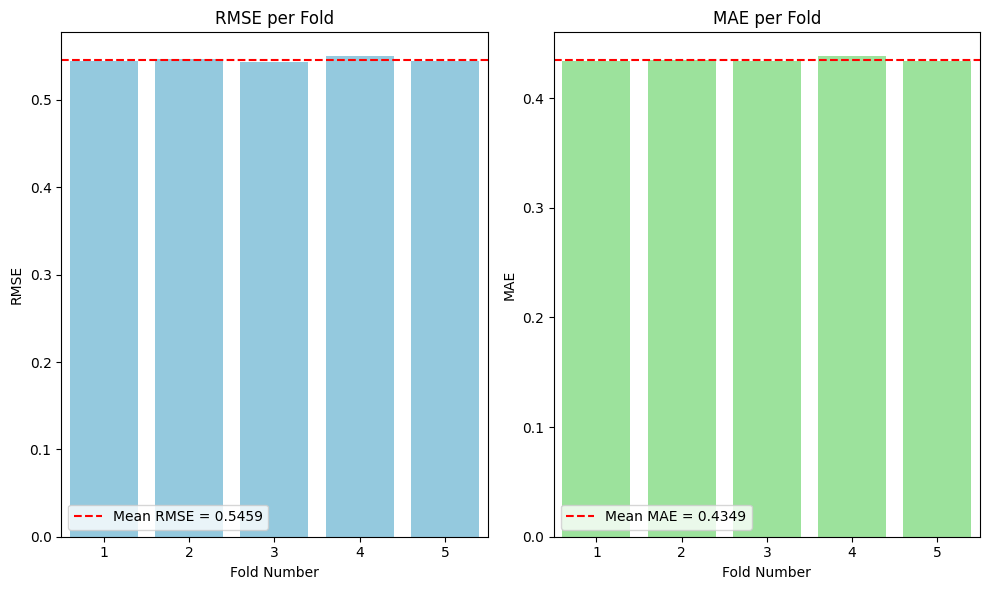

Mean RMSE: 0.5459
Standard Deviation RMSE: 0.0022
Mean MAE: 0.4349
Standard Deviation MAE: 0.0017


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cross-validation results (using example values from the output)
folds = [1, 2, 3, 4, 5]
rmse_values = [0.5442, 0.5465, 0.5439, 0.5499, 0.5448]  # RMSE for each fold
mae_values = [0.4336, 0.4353, 0.4336, 0.4382, 0.4340]  # MAE for each fold
mean_rmse = np.mean(rmse_values)
std_rmse = np.std(rmse_values)
mean_mae = np.mean(mae_values)
std_mae = np.std(mae_values)

# Create a figure for the visualizations
plt.figure(figsize=(10, 6))

# Subplot 1: RMSE per fold
plt.subplot(1, 2, 1)
sns.barplot(x=folds, y=rmse_values, color='skyblue')
plt.axhline(y=mean_rmse, color='r', linestyle='--', label=f'Mean RMSE = {mean_rmse:.4f}')
plt.title('RMSE per Fold')
plt.xlabel('Fold Number')
plt.ylabel('RMSE')
plt.legend()

# Subplot 2: MAE per fold
plt.subplot(1, 2, 2)
sns.barplot(x=folds, y=mae_values, color='lightgreen')
plt.axhline(y=mean_mae, color='r', linestyle='--', label=f'Mean MAE = {mean_mae:.4f}')
plt.title('MAE per Fold')
plt.xlabel('Fold Number')
plt.ylabel('MAE')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Print summary values for RMSE and MAE
print(f'Mean RMSE: {mean_rmse:.4f}')
print(f'Standard Deviation RMSE: {std_rmse:.4f}')
print(f'Mean MAE: {mean_mae:.4f}')
print(f'Standard Deviation MAE: {std_mae:.4f}')


Some More EDA

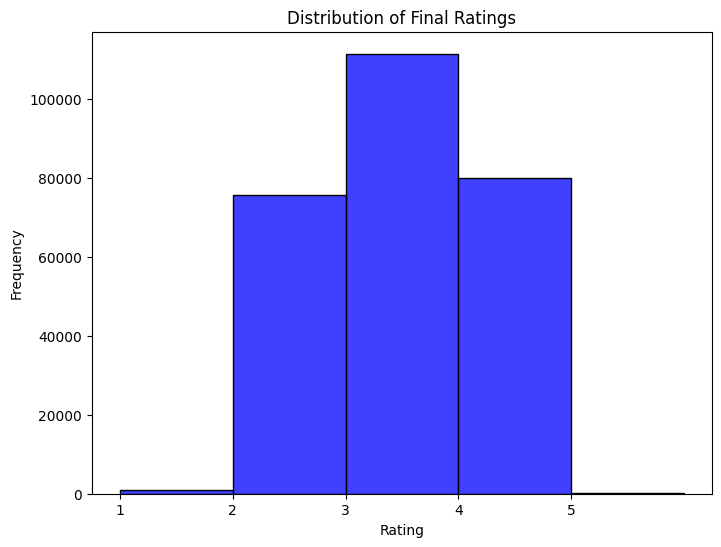

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(8, 6))

# Plot histogram without KDE and with appropriate bin edges
sns.histplot(df_features['Final_Rating'], bins=range(1, 7), color='blue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Final Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))  # Assuming ratings are 1 to 5

plt.show()


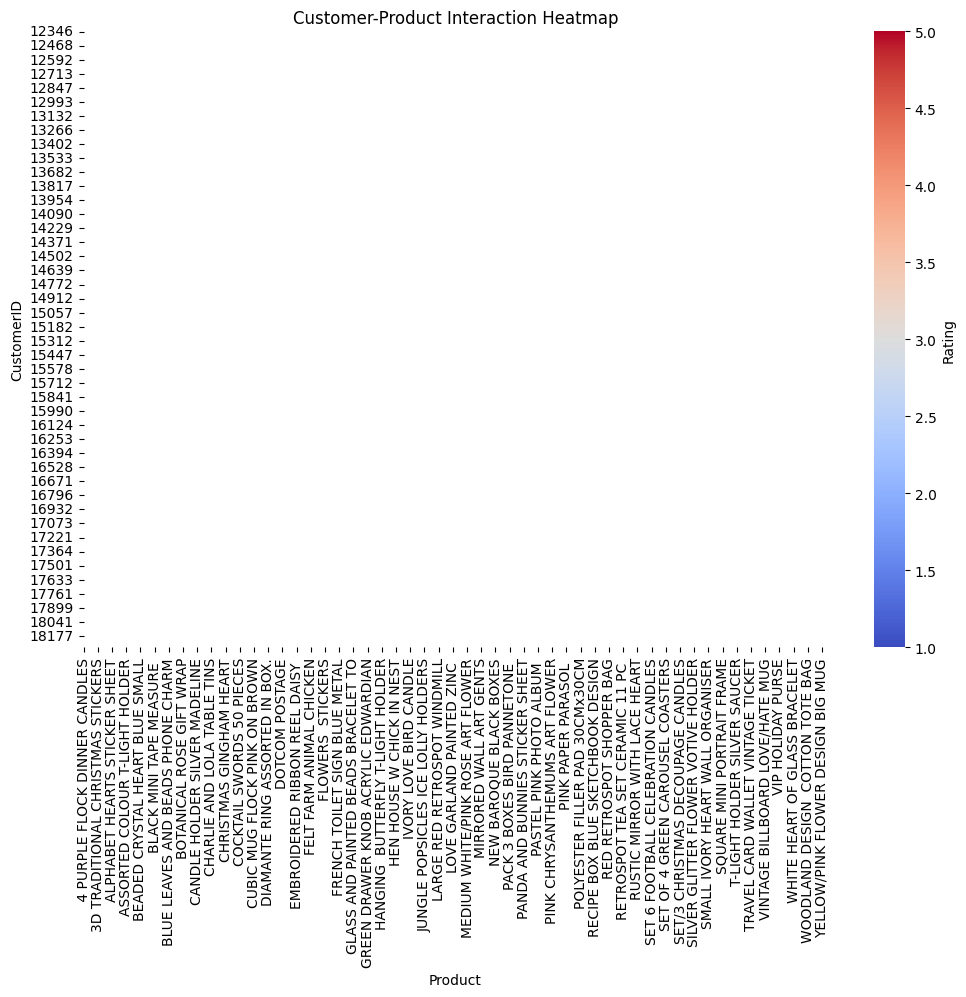

In [ ]:
# Assuming 'df_features' contains 'CustomerID' and 'Description'
interaction_matrix = df_features.pivot_table(index='CustomerID', columns='Description', values='Final_Rating', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(interaction_matrix, cmap='coolwarm', cbar_kws={'label': 'Rating'}, linewidths=0.5)
plt.title('Customer-Product Interaction Heatmap')
plt.xlabel('Product')
plt.ylabel('CustomerID')
plt.show()


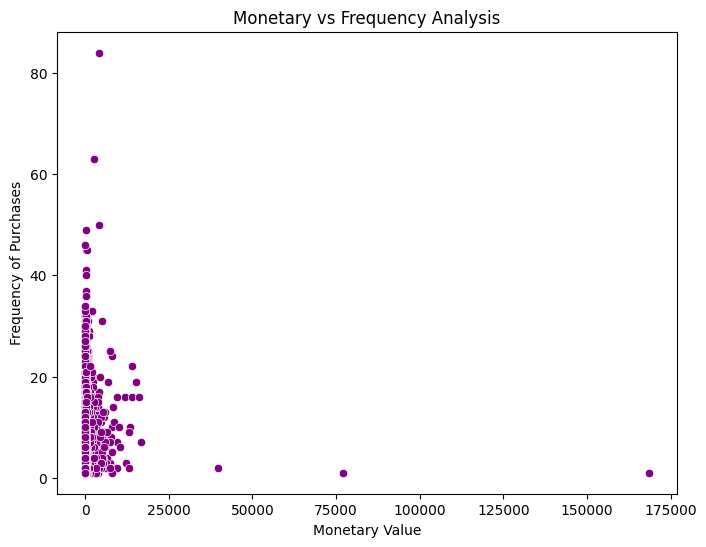

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_features, x='Monetary', y='Frequency', color='purple')
plt.title('Monetary vs Frequency Analysis')
plt.xlabel('Monetary Value')
plt.ylabel('Frequency of Purchases')
plt.show()


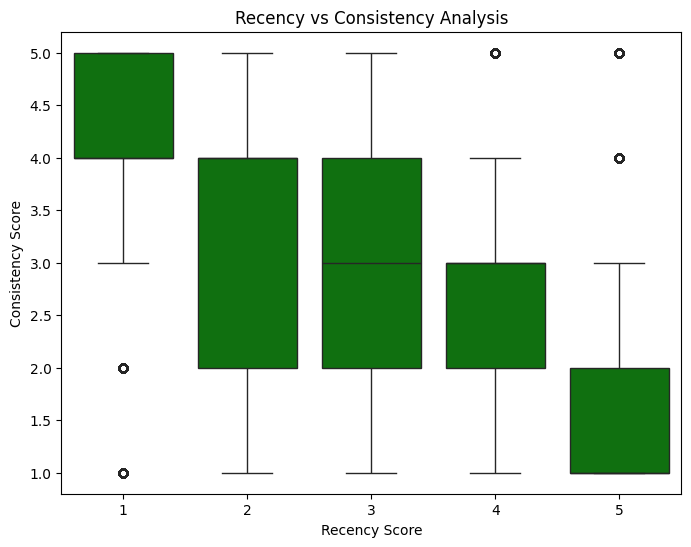

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_features, x='Recency_Score', y='Consistency_Score', color='green')
plt.title('Recency vs Consistency Analysis')
plt.xlabel('Recency Score')
plt.ylabel('Consistency Score')
plt.show()


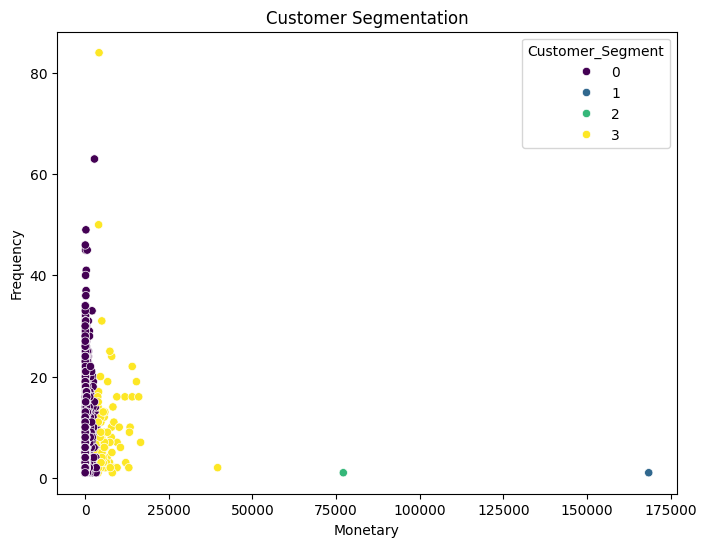

In [ ]:
from sklearn.cluster import KMeans

# Clustering based on 'Monetary' and 'Frequency'
X = df_features[['Monetary', 'Frequency']]

# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df_features['Customer_Segment'] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_features, x='Monetary', y='Frequency', hue='Customer_Segment', palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.show()


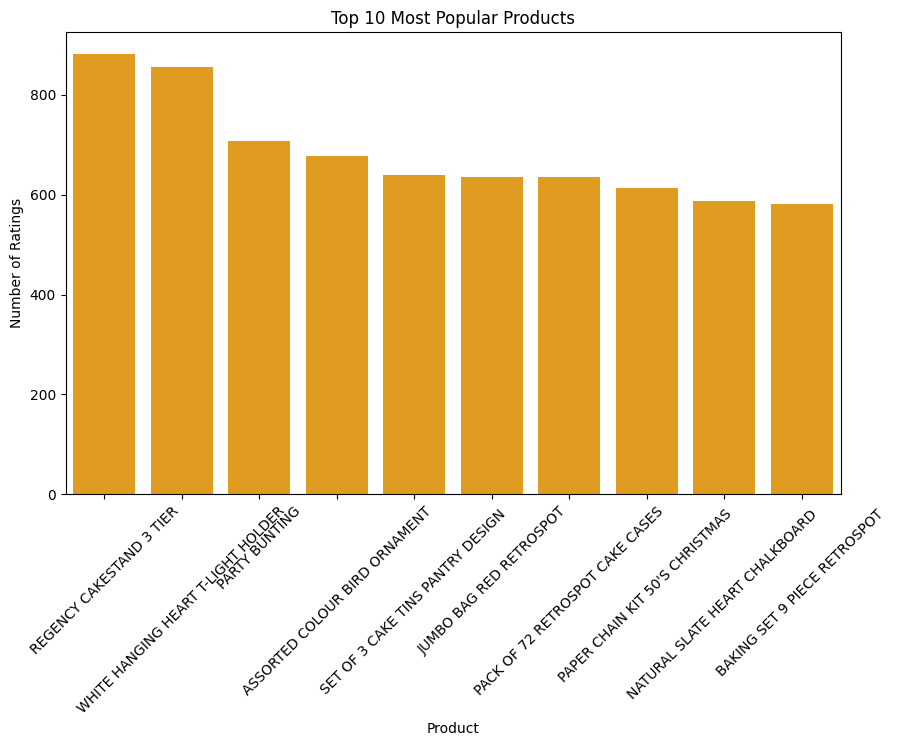

In [ ]:
# Count of ratings per product
top_products = df_features['Description'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values, color='orange')
plt.title('Top 10 Most Popular Products')
plt.xlabel('Product')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()


<ipython-input-124-8d6f573b1b72>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_products_by_percentage.index, y=top_10_products_by_percentage.values, palette='coolwarm')


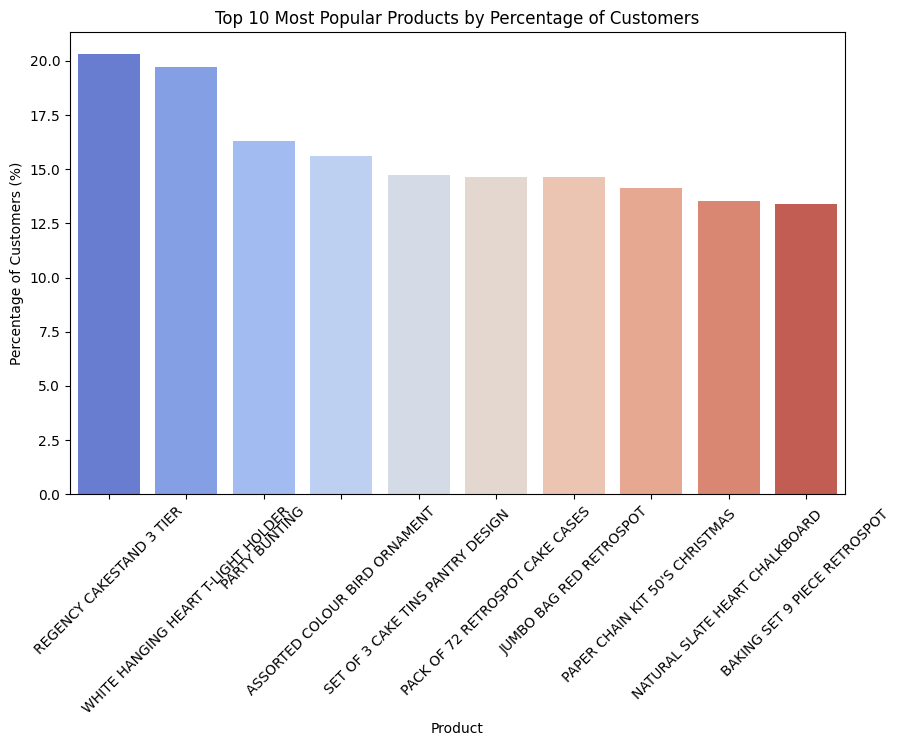

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_features' is your dataset with 'CustomerID' and 'Description' columns

# Step 1: Calculate the number of unique customers for each product
product_customer_count = df_features.groupby('Description')['CustomerID'].nunique()

# Step 2: Calculate the total number of unique customers
total_customers = df_features['CustomerID'].nunique()

# Step 3: Calculate the percentage of customers who rated each product
product_customer_percentage = (product_customer_count / total_customers) * 100

# Step 4: Sort the products by percentage of customers and get the top 10
top_10_products_by_percentage = product_customer_percentage.sort_values(ascending=False).head(10)

# Step 5: Plotting the top 10 products by percentage of customers
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_products_by_percentage.index, y=top_10_products_by_percentage.values, palette='coolwarm')
plt.title('Top 10 Most Popular Products by Percentage of Customers')
plt.xlabel('Product')
plt.ylabel('Percentage of Customers (%)')
plt.xticks(rotation=45)
plt.show()


Correlation between popularity and price: -0.0451448912567199


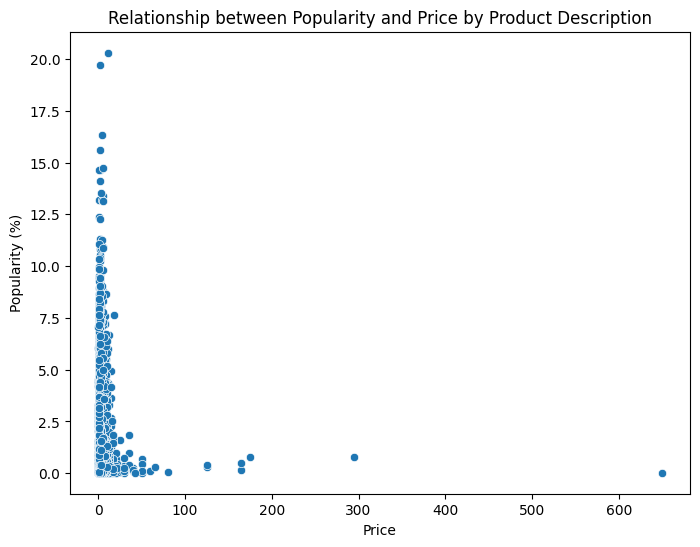

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_cleaned is your cleaned dataset
# For demonstration, df_cleaned should have the necessary columns: 'Description', 'CustomerID', and 'UnitPrice'

# Step 1: Calculate the number of unique customers who purchased each product description
product_customer_count = df_cleaned.groupby('Description')['CustomerID'].nunique()

# Step 2: Calculate the total number of unique customers
total_customers = df_cleaned['CustomerID'].nunique()

# Step 3: Calculate the percentage of customers who purchased each product description (popularity)
product_customer_percentage = (product_customer_count / total_customers) * 100

# Step 4: Get the price for each product description (assuming 'UnitPrice' contains the price)
product_price = df_cleaned.groupby('Description')['UnitPrice'].first()  # Taking the first price for each product description

# Step 5: Combine the popularity and price data by product description
popularity_price_data = pd.DataFrame({
    'Popularity': product_customer_percentage,
    'Price': product_price
}).dropna()  # Drop any rows with missing data

# Step 6: Calculate the correlation between popularity and price
correlation = popularity_price_data.corr().loc['Popularity', 'Price']
print(f"Correlation between popularity and price: {correlation}")

# Step 7: Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x=popularity_price_data['Price'], y=popularity_price_data['Popularity'])
plt.title('Relationship between Popularity and Price by Product Description')
plt.xlabel('Price')
plt.ylabel('Popularity (%)')
plt.show()
